# Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 1 to 1492
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   INPUT0    1492 non-null   float64
 1   INPUT1    1492 non-null   float64
 2   INPUT2    1492 non-null   float64
 3   INPUT3    1492 non-null   float64
 4   INPUT4    1492 non-null   float64
 5   INPUT5    1492 non-null   float64
 6   INPUT6    1492 non-null   float64
 7   INPUT7    1492 non-null   float64
 8   INPUT8    1492 non-null   float64
 9   TARGET_X  1492 non-null   float64
 10  TARGET_Y  1492 non-null   float64
dtypes: float64(11)
memory usage: 139.9 KB


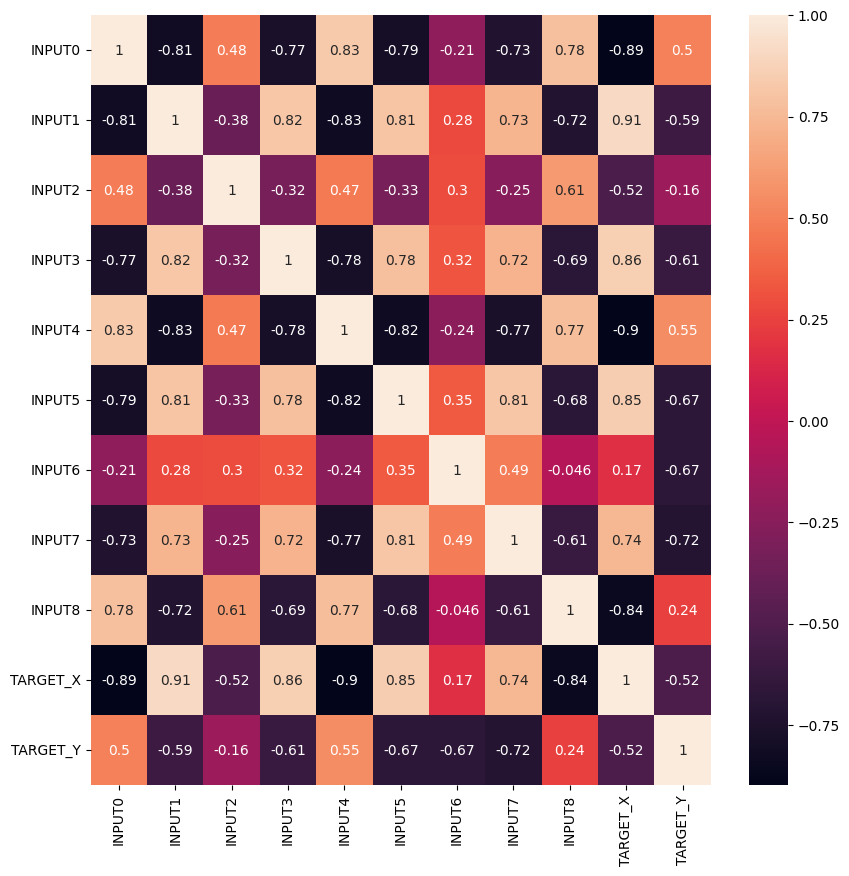

x_train  (1044, 9)
y_train  (1044, 2)
x_test  (448, 9)
y_test  (448, 2)


In [2]:
from set_extraction import x_train, y_train, x_test, y_test

# Models

In [3]:
from sklearn.metrics import make_scorer

from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor

In [4]:
def MEE(actual, predict):

    return np.mean(np.linalg.norm(actual - predict, axis=1))
    

In [5]:
results = []

Text(0, 0.5, 'MEE Score')

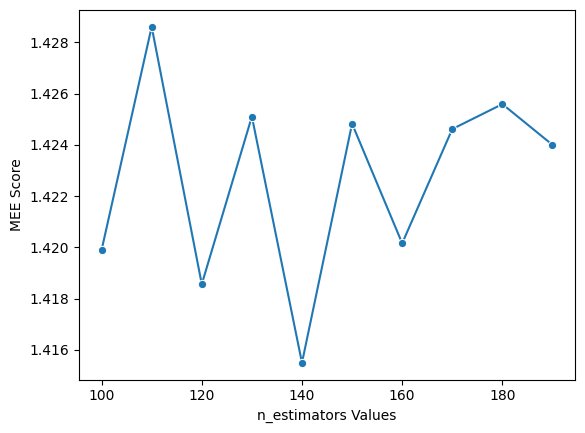

In [14]:
k_values = [i for i in range(100,200,10)]
scores = []

for k in k_values:
    knn = ExtraTreesRegressor(n_estimators=k)
    score = cross_val_score(knn, x_train, y_train, cv=5, scoring=make_scorer(MEE, greater_is_better=False))
    scores.append(-np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("n_estimators Values")
plt.ylabel("MEE Score")

Text(0, 0.5, 'MEE Score')

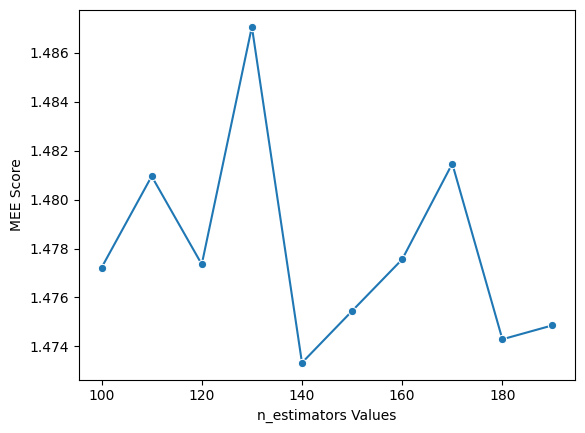

In [15]:
k_values = [i for i in range(100,200,10)]
scores = []

for k in k_values:
    knn = RandomForestRegressor(n_estimators=k)
    score = cross_val_score(knn, x_train, y_train, cv=5, scoring=make_scorer(MEE, greater_is_better=False))
    scores.append(-np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("n_estimators Values")
plt.ylabel("MEE Score")

Text(0, 0.5, 'MEE Score')

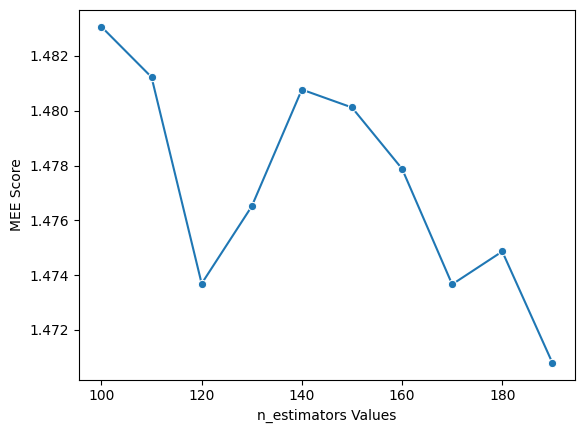

In [16]:
k_values = [i for i in range(100,200,10)]
scores = []

for k in k_values:
    knn = BaggingRegressor(n_estimators=k)
    score = cross_val_score(knn, x_train, y_train, cv=5, scoring=make_scorer(MEE, greater_is_better=False))
    scores.append(-np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("n_estimators Values")
plt.ylabel("MEE Score")

# Ensemble 

## ExtraTreesRegressor 

### Grid search for parameter setting 


In [17]:
#params

In [18]:
params = { 
     'n_estimators': [100, 120, 140],
     #'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
     'max_depth': [5, 7, 10, 15, 20, 25, 30, 50],
     'min_samples_split': [2, 3, 5],
     'min_samples_leaf': [1, 2, 5],
     'min_weight_fraction_leaf': [0.0, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005],
     #'bootstrap': [False, True],
     #'max_samples': [None, 0.1, 0.3, 0.5, 0.8],
     'ccp_alpha': [0.0, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005]
}

In [19]:
# ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

In [20]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1

edt_search = ExtraTreesRegressor(random_state=42, n_jobs=-1) 

edt_cv = GridSearchCV(estimator=edt_search, param_grid=params, scoring=make_scorer(MEE, greater_is_better = False), 
                      cv=5, verbose=4, n_jobs=n_jobs_search)
edt_cv.fit(x_train, y_train)

Fitting 5 folds for each of 17496 candidates, totalling 87480 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005,
                                       0.0001, 0.0005],
                         'max_depth': [5, 7, 10, 15, 20, 25, 30, 50],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 3, 5],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.5, 0.01, 0.05,
                                                      0.001, 0.005, 0.0001,
                                                      0.0005],
                         'n_estimators': [100, 120, 140]},
             scoring=make_scorer(MEE, greater_is_better=False), verbose=4)

In [21]:
edt_cv.best_params_

{'ccp_alpha': 0.0005,
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0001,
 'n_estimators': 120}

In [22]:
# validation
edt_cv.best_score_

-1.406702136056086

In [23]:
# save the model to disk
joblib.dump(edt_cv.best_estimator_, 'cup_models/ets2.z')

['cup_models/ets2.z']

### Final model

In [24]:
edec_tree = joblib.load('cup_models/ets2.z')

In [25]:
train_pred_edt = edec_tree.predict(x_train)

In [26]:
print('MEE train set ', MEE(y_train, train_pred_edt))

MEE train set  0.4672822980192045


In [27]:
test_pred_edt = edec_tree.predict(x_test)

In [28]:
print('MEE test set ', MEE(y_test, test_pred_edt))

MEE test set  1.4523209063296465


[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

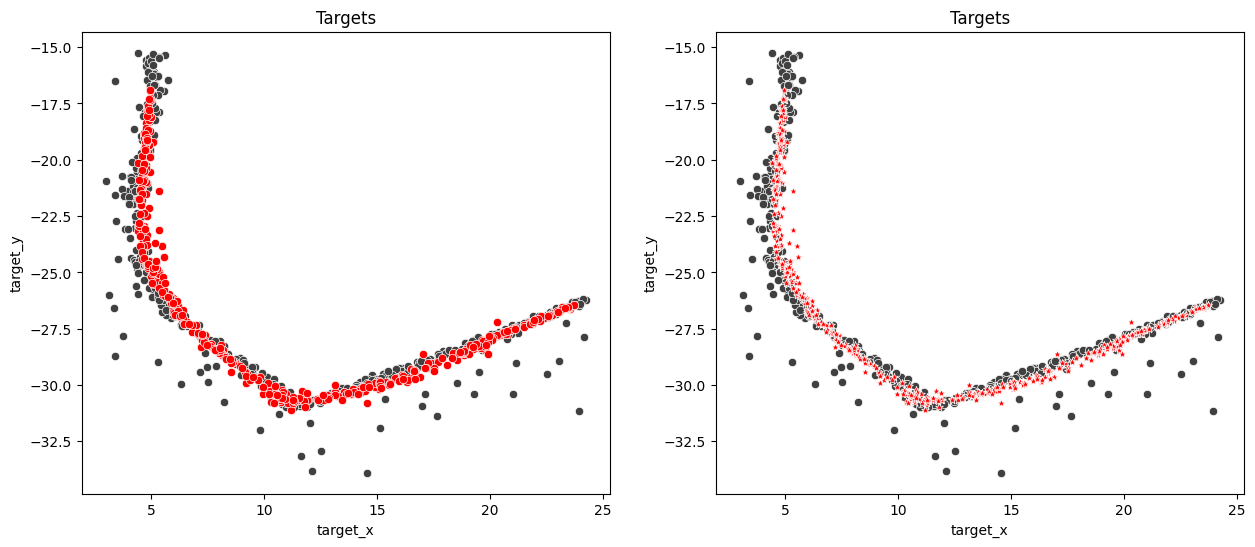

In [29]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[0])
sns.scatterplot(x=test_pred_edt[:,0],y=test_pred_edt[:,1],color='r',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[1])
sns.scatterplot(x=test_pred_edt[:,0],y=test_pred_edt[:,1],color='r',ax=ax[1], marker='*')
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

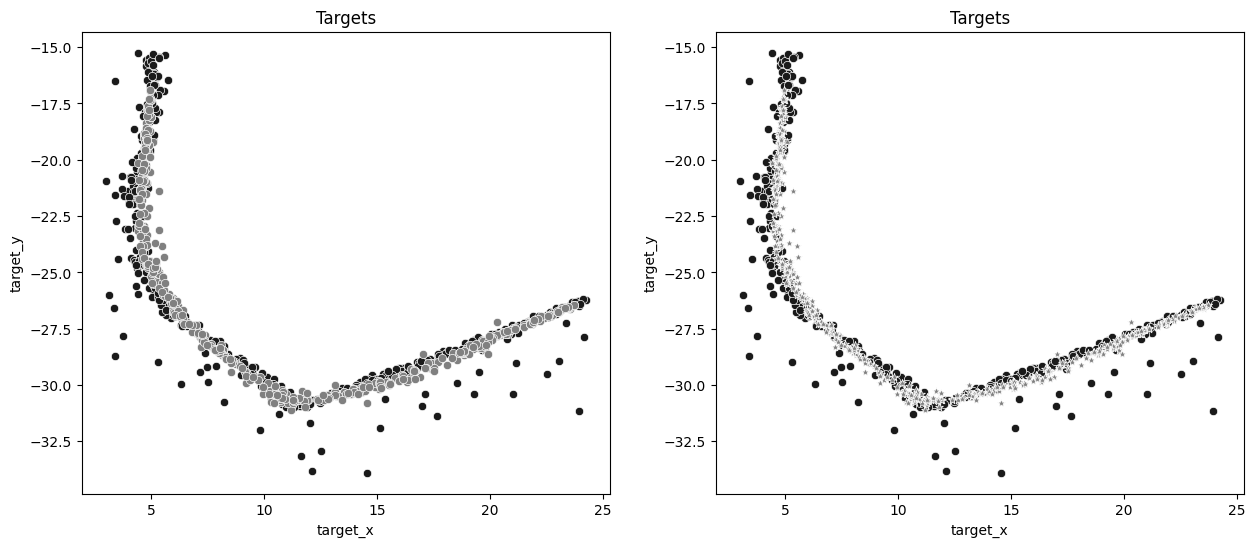

In [30]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[0])
sns.scatterplot(x=test_pred_edt[:,0],y=test_pred_edt[:,1],color='.5',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[1])
sns.scatterplot(x=test_pred_edt[:,0],y=test_pred_edt[:,1],color='.5',ax=ax[1], marker='*')
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

In [31]:
results.append(('ExtraTreesRegressor train', MEE(y_train, train_pred_edt)))
results.append(('ExtraTreesRegressor validation', edt_cv.best_score_))

## RandomForestRegressor

### Grid search for parameter setting 


In [32]:
#params

In [33]:
params = { 
     'n_estimators': [140, 160, 180],
     #'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
     'max_depth': [5, 7, 10, 15, 20, 25, 30, 50],
     'min_samples_split': [2, 3, 5],
     'min_samples_leaf': [1, 2, 5],
     'min_weight_fraction_leaf': [0.0, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005],
     #'bootstrap': [False, True],
     #'max_samples': [None, 0.1, 0.3, 0.5, 0.8],
     'ccp_alpha': [0.0, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005]
}

In [34]:
# ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

In [35]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1

rfr_search = RandomForestRegressor(random_state=42, n_jobs=-1) 

rfr_cv = GridSearchCV(estimator=rfr_search, param_grid=params, scoring=make_scorer(MEE, greater_is_better = False), 
                      cv=5, verbose=4, n_jobs=n_jobs_search) 
rfr_cv.fit(x_train, y_train)

Fitting 5 folds for each of 17496 candidates, totalling 87480 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005,
                                       0.0001, 0.0005],
                         'max_depth': [5, 7, 10, 15, 20, 25, 30, 50],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 3, 5],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.5, 0.01, 0.05,
                                                      0.001, 0.005, 0.0001,
                                                      0.0005],
                         'n_estimators': [140, 160, 180]},
             scoring=make_scorer(MEE, greater_is_better=False), verbose=4)

In [36]:
rfr_cv.best_params_

{'ccp_alpha': 0.001,
 'max_depth': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 180}

In [37]:
# validation
rfr_cv.best_score_

-1.4644086291179605

In [38]:
# save the model to disk
joblib.dump(rfr_cv.best_estimator_, 'cup_models/rf2.z')

['cup_models/rf2.z']

### Final model

In [39]:
rfr = joblib.load('cup_models/rf2.z')

In [40]:
train_pred_rfr = rfr.predict(x_train)

In [41]:
print('MEE train set ', MEE(y_train, train_pred_rfr))

MEE train set  0.7316039290039322


In [42]:
test_pred_rfr = rfr.predict(x_test)

In [43]:
print('MEE test set ', MEE(y_test, test_pred_rfr))

MEE test set  1.5041392608598039


[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

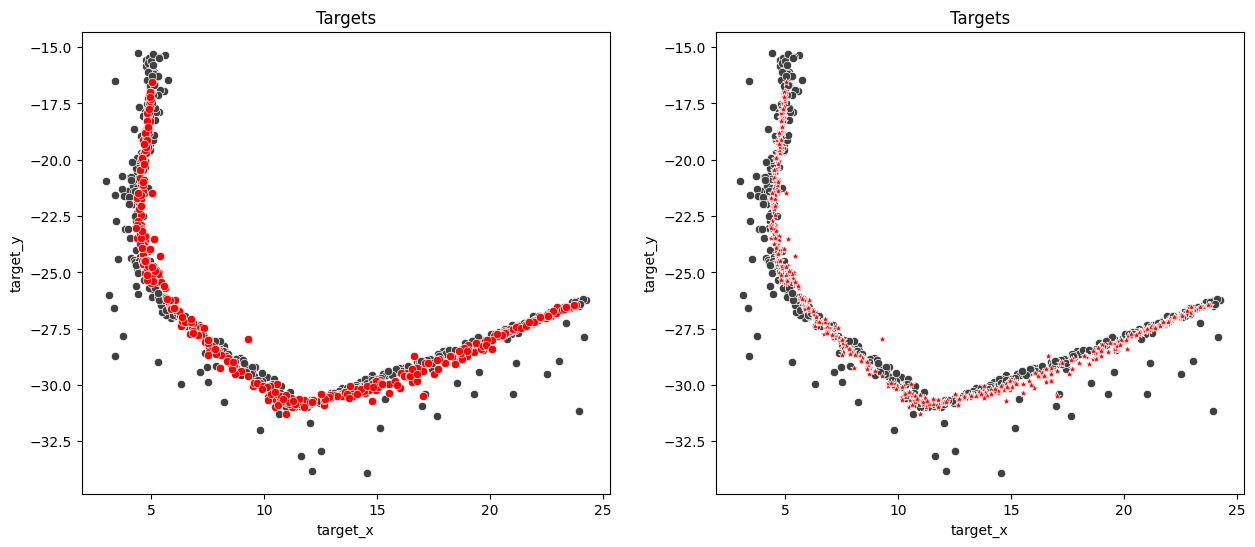

In [44]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[0])
sns.scatterplot(x=test_pred_rfr[:,0],y=test_pred_rfr[:,1],color='r',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[1])
sns.scatterplot(x=test_pred_rfr[:,0],y=test_pred_rfr[:,1],color='r',ax=ax[1], marker='*')
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

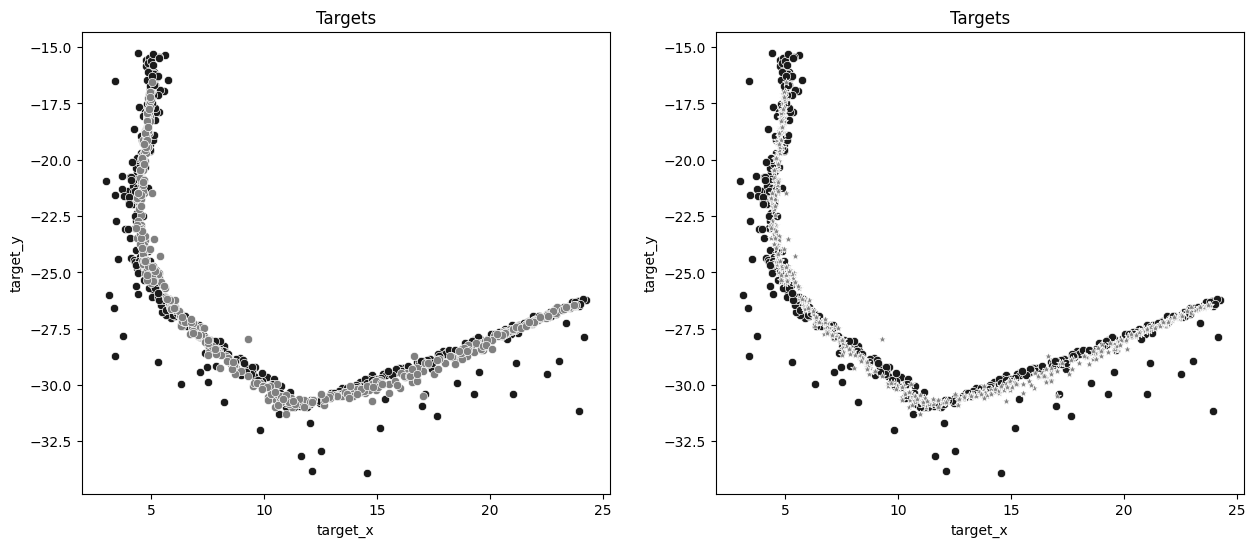

In [45]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[0])
sns.scatterplot(x=test_pred_rfr[:,0],y=test_pred_rfr[:,1],color='.5',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[1])
sns.scatterplot(x=test_pred_rfr[:,0],y=test_pred_rfr[:,1],color='.5',ax=ax[1], marker='*')
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

In [46]:
results.append(('RandomForestRegressor train', MEE(y_train, train_pred_rfr)))
results.append(('RandomForestRegressor validation', rfr_cv.best_score_))

## BaggingRegressor

### Grid search for parameter setting 


In [47]:
#params

In [48]:
params = { 
     'n_estimators': [160, 180, 200],
     'max_samples': [1.0, 0.1, 0.3, 0.5, 0.7, 0.8, 0.9],
     'bootstrap': [False, True],
     'bootstrap_features': [False, True]
}

In [49]:
# ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

In [50]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1

br_search = BaggingRegressor(random_state=42, n_jobs=-1) 

br_cv = GridSearchCV(estimator=br_search, param_grid=params, scoring=make_scorer(MEE, greater_is_better = False), 
                     cv=5, verbose=4, n_jobs=n_jobs_search) 
br_cv.fit(x_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=BaggingRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'bootstrap_features': [False, True],
                         'max_samples': [1.0, 0.1, 0.3, 0.5, 0.7, 0.8, 0.9],
                         'n_estimators': [160, 180, 200]},
             scoring=make_scorer(MEE, greater_is_better=False), verbose=4)

In [51]:
br_cv.best_params_

{'bootstrap': True,
 'bootstrap_features': False,
 'max_samples': 0.7,
 'n_estimators': 200}

In [52]:
# validation
br_cv.best_score_

-1.4652168562067156

In [53]:
# save the model to disk
joblib.dump(br_cv.best_estimator_, 'cup_models/br2.z')

['cup_models/br2.z']

### Final model

In [54]:
br = joblib.load('cup_models/br2.z')

In [55]:
train_pred_br = br.predict(x_train)

In [56]:
print('MEE train set ', MEE(y_train, train_pred_br))

MEE train set  0.7308544655296272


In [57]:
test_pred_br = br.predict(x_test)

In [58]:
print('MEE test set ', MEE(y_test, test_pred_br))

MEE test set  1.5122142143669297


[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

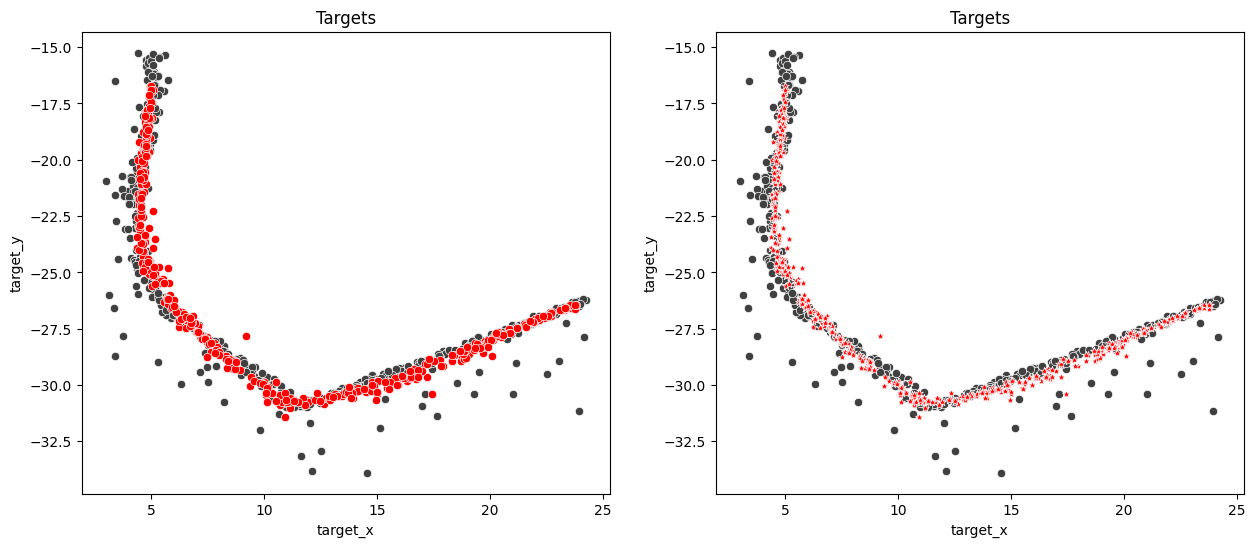

In [59]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[0])
sns.scatterplot(x=test_pred_br[:,0],y=test_pred_br[:,1],color='r',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[1])
sns.scatterplot(x=test_pred_br[:,0],y=test_pred_br[:,1],color='r',ax=ax[1], marker='*')
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

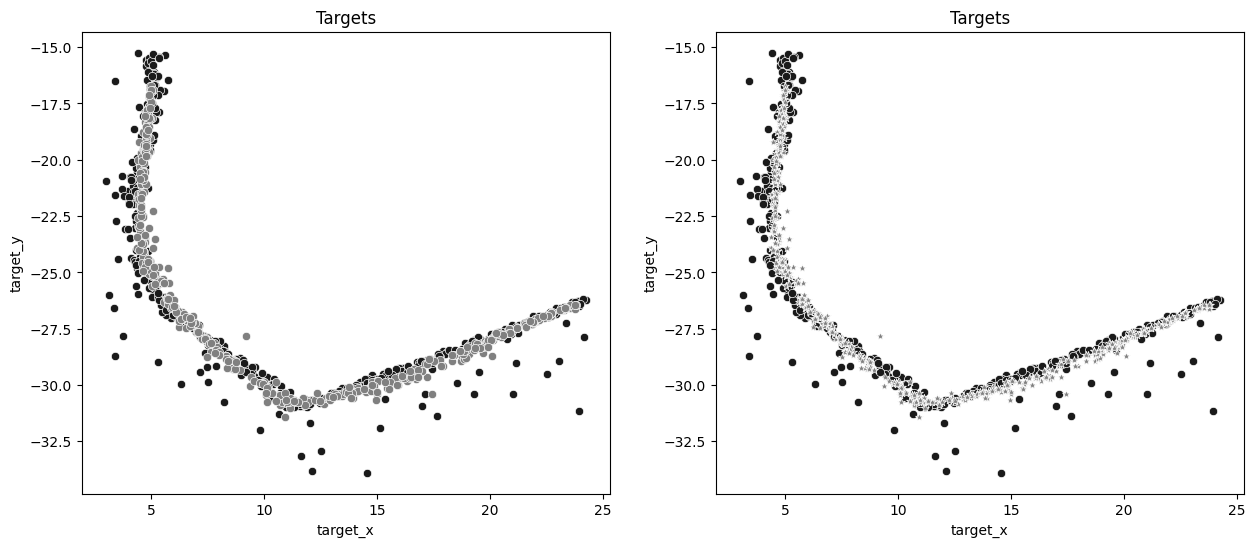

In [60]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[0])
sns.scatterplot(x=test_pred_br[:,0],y=test_pred_br[:,1],color='.5',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[1])
sns.scatterplot(x=test_pred_br[:,0],y=test_pred_br[:,1],color='.5',ax=ax[1], marker='*')
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

In [61]:
results.append(('BaggingRegressor train', MEE(y_train, train_pred_br)))
results.append(('BaggingRegressor validation', br_cv.best_score_))

# Summary

In [62]:
for i in range(len(results)):
  print(results[i])

('ExtraTreesRegressor train', 0.4672822980192045)
('ExtraTreesRegressor validation', -1.406702136056086)
('RandomForestRegressor train', 0.7316039290039322)
('RandomForestRegressor validation', -1.4644086291179605)
('BaggingRegressor train', 0.7308544655296272)
('BaggingRegressor validation', -1.4652168562067156)
